In [1]:
import ROOT
import random
import array
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.26/04


In [2]:
binedge = [0,10,20,26,30,33,36,40,44,50,70,200]
n = len(binedge)-1    # Number of pt ranges.
N = 800               # Number of bins in probe inv. mass histograms.

In [3]:
chain = ROOT.TChain('Events')
chain.Add('SkimTree_1.root')
chain.Add('SkimTree_2.root')
chain.Add('SkimTree_3.root')
chain.Add('SkimTree_4.root')
chain.Add('SkimTree_5.root')
chain.Add('SkimTree_6.root')
chain.Add('SkimTree_7.root')
chain.Add('SkimTree_8.root')
chain.Add('SkimTree_9.root')
chain.Add('SkimTree_10.root')
chain.Add('SkimTree_11.root')
chain.Add('SkimTree_12.root')
chain.Add('SkimTree_13.root')
chain.Add('SkimTree_14.root')
chain.Add('SkimTree_15.root')
chain.Add('SkimTree_16.root')
chain.Add('SkimTree_17.root')
chain.Add('SkimTree_18.root')
chain.Add('SkimTree_19.root')
evcutflow = ROOT.TH1F('cuts', 'Events Cut', 3, -0.5, 2.5)
mucutflow = ROOT.TH1F('mucuts', 'Muon Cut', 5, -0.5, 4.5)
mu1pt = ROOT.TH1F('pt_muon_1', 'Probe_pt', 200, 0, 200)
mu2pt = ROOT.TH1F('pt_muon_2', 'Probe_pt_2', 200, 0, 200)
inv_mas = ROOT.TH1F('inv', '', 1000, 40, 140)

In [4]:
probeiv1 = ROOT.TH1F('inv1', 'Inv. mass for 1st pt range', N, 40, 140)
probeiv1c = ROOT.TH1F('inv1c', 'Inv. mass for 1st pt range after cut', N, 40, 140)
probeiv2 = ROOT.TH1F('inv2', 'Inv. mass for 2nd pt range', N, 40, 140)
probeiv2c = ROOT.TH1F('inv2c', 'Inv. mass for 2nd pt range after cut', N, 40, 140)
probeiv3 = ROOT.TH1F('inv3', 'Inv. mass for 3rd pt range', N, 40, 140)
probeiv3c = ROOT.TH1F('inv3c', 'Inv. mass for 3rd pt range after cut', N, 40, 140)
probeiv4 = ROOT.TH1F('inv4', 'Inv. mass for 4th pt range', N, 40, 140)
probeiv4c = ROOT.TH1F('inv4c', 'Inv. mass for 4th pt range after cut', N, 40, 140)
probeiv5 = ROOT.TH1F('inv5', 'Inv. mass for 5th pt range', N, 40, 140)
probeiv5c = ROOT.TH1F('inv5c', 'Inv. mass for 5th pt range after cut', N, 40, 140)
probeiv6 = ROOT.TH1F('inv6', 'Inv. mass for 6th pt range', N, 40, 140)
probeiv6c = ROOT.TH1F('inv6c', 'Inv. mass for 6th pt range after cut', N, 40, 140)
probeiv7 = ROOT.TH1F('inv7', 'Inv. mass for 7th pt range', N, 40, 140)
probeiv7c = ROOT.TH1F('inv7c', 'Inv. mass for 7th pt range after cut', N, 40, 140)
probeiv8 = ROOT.TH1F('inv8', 'Inv. mass for 8th pt range', N, 40, 140)
probeiv8c = ROOT.TH1F('inv8c', 'Inv. mass for 8th pt range after cut', N, 40, 140)
probeiv9 = ROOT.TH1F('inv9', 'Inv. mass for 9th pt range', N, 40, 140)
probeiv9c = ROOT.TH1F('inv9c', 'Inv. mass for 9th pt range after cut', N, 40, 140)
probeiv10 = ROOT.TH1F('inv10', 'Inv. mass for 10th pt range', N, 40, 140)
probeiv10c = ROOT.TH1F('inv10c', 'Inv. mass for 10th pt range after cut', N, 40, 140)
probeiv11 = ROOT.TH1F('inv11', 'Inv. mass for 11th pt range', N, 40, 140)
probeiv11c = ROOT.TH1F('inv11c', 'Inv. mass for 11th pt range after cut', N, 40, 140)

In [ ]:
for i, entry in enumerate(chain):
    
    mu_pts_per_event    = list(entry.Muon_pt)
    mu_etas_per_event   = list(entry.Muon_eta)
    mu_phis_per_event   = list(entry.Muon_phi)
    mu_mass_per_event   = list(entry.Muon_mass)
    mu_charge_per_event = list(entry.Muon_charge)
    mu_dxy_per_event    = list(entry.Muon_dxy)
    mu_dz_per_event     = list(entry.Muon_dz)
    mu_ip3d_per_event   = list(entry.Muon_ip3d)
    mu_iso_per_event    = list(entry.Muon_pfRelIso04_all)
    mu_tid_per_event    = list(entry.Muon_tightId)
    
    evcutflow.Fill(0) 
    
    if len(mu_pts_per_event) < 2:     # We pass only those events which have atleast 2 muons.
        continue
    
    evcutflow.Fill(1)
    
    mu_clean_idxs = [] 
    
    for i in range(len(mu_pts_per_event)):
        mucutflow.Fill(0)
        if mu_pts_per_event[i] < 20:
            continue
        mucutflow.Fill(1)
        if abs(mu_etas_per_event[i]) > 2.4:
            continue
        mucutflow.Fill(2)
        if mu_iso_per_event[i] > 0.3:
            continue
        mucutflow.Fill(3)
        if mu_tid_per_event[i] < 0.9:
            continue
        mucutflow.Fill(4)
        mu_clean_idxs.append(i)
        
    if len(mu_clean_idxs) < 1:        # We pass only those events which has atleast one tag muon.
        continue
    
    random.shuffle(mu_clean_idxs)     # Re-shuffle the tag muons.
    
    evcutflow.Fill(2)
    
    tag_idxs = mu_clean_idxs[0]       # Saved the index of the tag muon of the event.
    
    tp4 = ROOT.TLorentzVector()                     # 4 momentum of the tag muon.
    tp4.SetPtEtaPhiM(mu_pts_per_event[tag_idxs], 
                    mu_etas_per_event[tag_idxs], 
                    mu_phis_per_event[tag_idxs], 
                    mu_mass_per_event[tag_idxs])
    
    random.shuffle(mu_pts_per_event)
    
    for j in range(len(mu_pts_per_event)): 
        if j != tag_idxs :
            if (mu_charge_per_event[tag_idxs] * mu_charge_per_event[j]) < 0:
                pp4 = ROOT.TLorentzVector()         # 4 momentum of the probe muon.
                pp4.SetPtEtaPhiM(mu_pts_per_event[j], 
                                mu_etas_per_event[j], 
                                mu_phis_per_event[j], 
                                mu_mass_per_event[j]) 

                invm = (pp4+tp4).M()               # Invariant mass.
                if 60 < invm < 120:
                    inv_mas.Fill(invm)
                    if 0 < mu_pts_per_event[j] < 10:
                        probeiv1.Fill(invm)
                    if 10 < mu_pts_per_event[j] < 20:
                        probeiv2.Fill(invm)
                    if 20 < mu_pts_per_event[j] < 26:
                        probeiv3.Fill(invm)
                    if 26 < mu_pts_per_event[j] < 30:
                        probeiv4.Fill(invm)
                    if 30 < mu_pts_per_event[j] < 33:
                        probeiv5.Fill(invm)
                    if 33 < mu_pts_per_event[j] < 36:
                        probeiv6.Fill(invm)
                    if 36 < mu_pts_per_event[j] < 40:
                        probeiv7.Fill(invm)
                    if 40 < mu_pts_per_event[j] < 44:
                        probeiv8.Fill(invm)
                    if 44 < mu_pts_per_event[j] < 50:
                        probeiv9.Fill(invm)
                    if 50 < mu_pts_per_event[j] < 70:
                        probeiv10.Fill(invm)
                    if 70 < mu_pts_per_event[j] < 200:
                        probeiv11.Fill(invm)

                    if mu_tid_per_event[j] > 0.9 and mu_iso_per_event[j] < 0.3:
                        if 0 < mu_pts_per_event[j] < 10:
                            probeiv1c.Fill(invm)
                        if 10 < mu_pts_per_event[j] < 20:
                            probeiv2c.Fill(invm)
                        if 20 < mu_pts_per_event[j] < 26:
                            probeiv3c.Fill(invm)
                        if 26 < mu_pts_per_event[j] < 30:
                            probeiv4c.Fill(invm)
                        if 30 < mu_pts_per_event[j] < 33:
                            probeiv5c.Fill(invm)
                        if 33 < mu_pts_per_event[j] < 36:
                            probeiv6c.Fill(invm)
                        if 36 < mu_pts_per_event[j] < 40:
                            probeiv7c.Fill(invm)
                        if 40 < mu_pts_per_event[j] < 44:
                            probeiv8c.Fill(invm)
                        if 44 < mu_pts_per_event[j] < 50:
                            probeiv9c.Fill(invm) 
                        if 50 < mu_pts_per_event[j] < 70:
                            probeiv10c.Fill(invm)  
                        if 70 < mu_pts_per_event[j] < 200:
                            probeiv11c.Fill(invm)    
                            

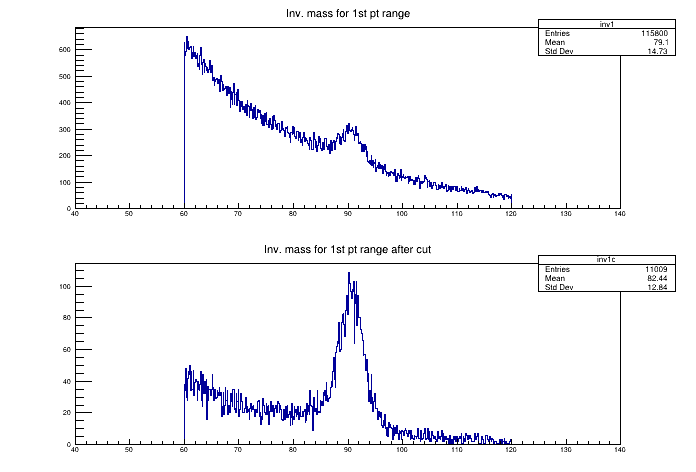

In [6]:
eff=[]           # We created a blank array to store efficiency values.
cc1 = ROOT.TCanvas()
cc1.Divide(1,2)
cc1.cd(1)
probeiv1.Draw()
cc1.cd(2)
probeiv1c.Draw()
cc1.Draw()
eff.append(probeiv1c.Integral()/probeiv1.Integral())

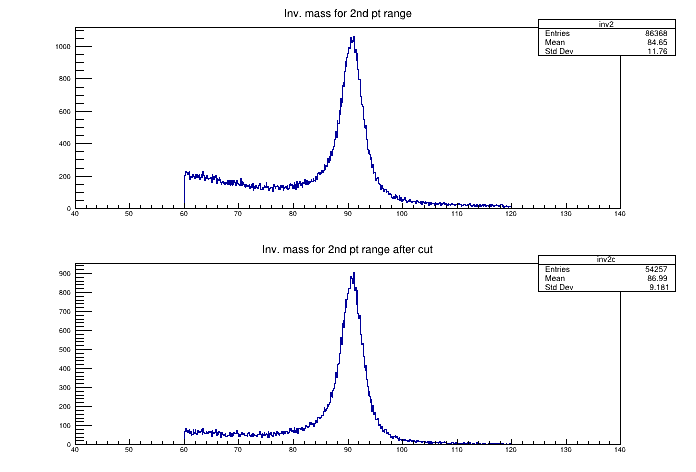

In [7]:
cc2 = ROOT.TCanvas()
cc2.Divide(1,2)
cc2.cd(1)
probeiv2.Draw()
cc2.cd(2)
probeiv2c.Draw()
cc2.Draw()
eff.append(probeiv2c.Integral()/probeiv2.Integral())

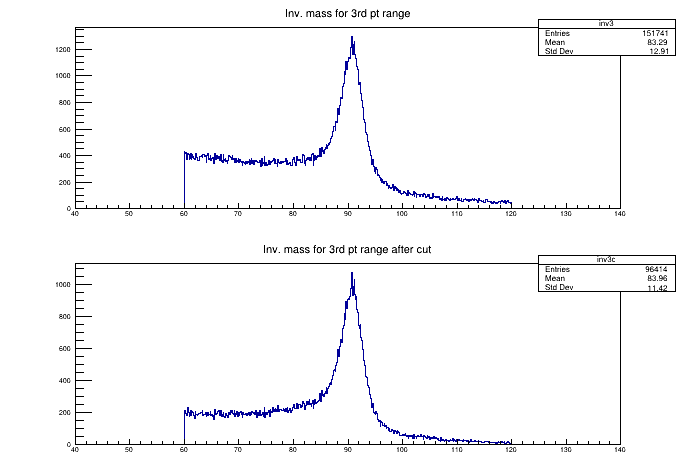

In [8]:
cc3 = ROOT.TCanvas()
cc3.Divide(1,2)
cc3.cd(1)
probeiv3.Draw()
cc3.cd(2)
probeiv3c.Draw()
cc3.Draw()
eff.append(probeiv3c.Integral()/probeiv3.Integral())

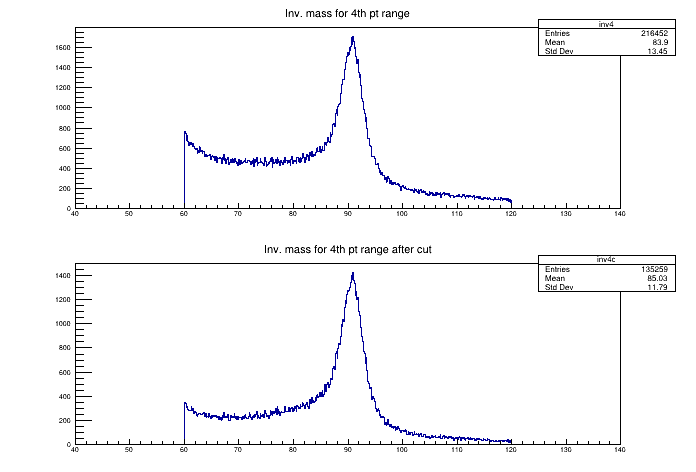

In [9]:
cc4 = ROOT.TCanvas()
cc4.Divide(1,2)
cc4.cd(1)
probeiv4.Draw()
cc4.cd(2)
probeiv4c.Draw()
cc4.Draw()
eff.append(probeiv4c.Integral()/probeiv4.Integral())

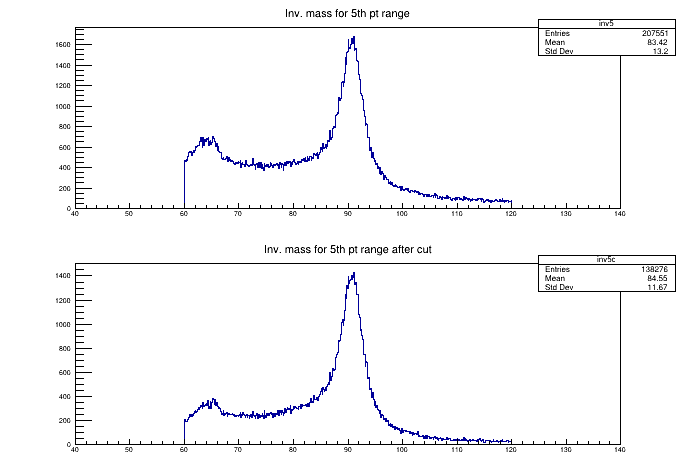

In [10]:
cc5 = ROOT.TCanvas()
cc5.Divide(1,2)
cc5.cd(1)
probeiv5.Draw()
cc5.cd(2)
probeiv5c.Draw()
cc5.Draw()
eff.append(probeiv5c.Integral()/probeiv5.Integral())

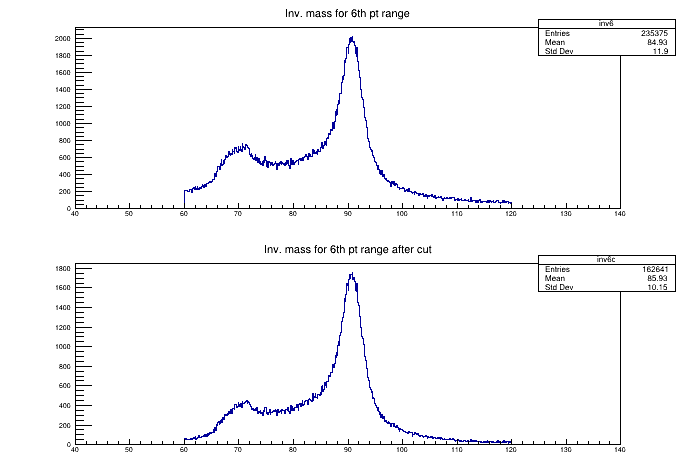

In [11]:
cc6 = ROOT.TCanvas()
cc6.Divide(1,2)
cc6.cd(1)
probeiv6.Draw()
cc6.cd(2)
probeiv6c.Draw()
cc6.Draw()
eff.append(probeiv6c.Integral()/probeiv6.Integral())

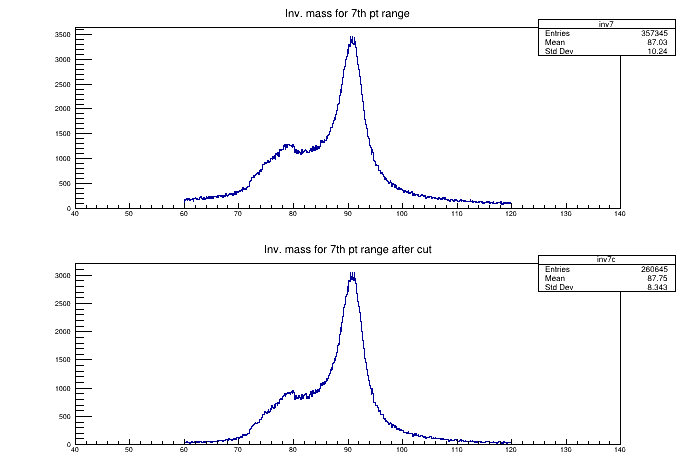

In [12]:
cc7 = ROOT.TCanvas()
cc7.Divide(1,2)
cc7.cd(1)
probeiv7.Draw()
cc7.cd(2)
probeiv7c.Draw()
cc7.Draw()
eff.append(probeiv7c.Integral()/probeiv7.Integral())

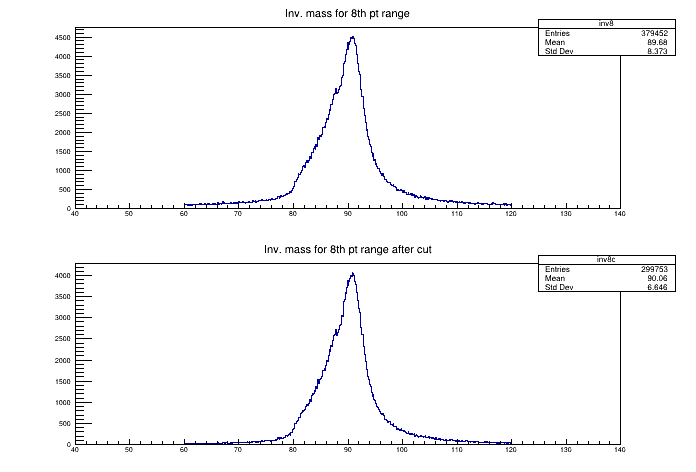

In [13]:
cc8 = ROOT.TCanvas()
cc8.Divide(1,2)
cc8.cd(1)
probeiv8.Draw()
cc8.cd(2)
probeiv8c.Draw()
cc8.Draw()
eff.append(probeiv8c.Integral()/probeiv8.Integral())

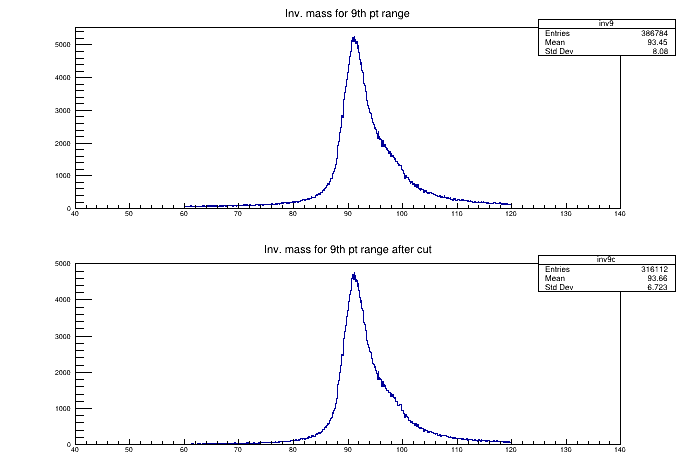

In [14]:
cc9 = ROOT.TCanvas()
cc9.Divide(1,2)
cc9.cd(1)
probeiv9.Draw()
cc9.cd(2)
probeiv9c.Draw()
cc9.Draw()
eff.append(probeiv9c.Integral()/probeiv9.Integral())

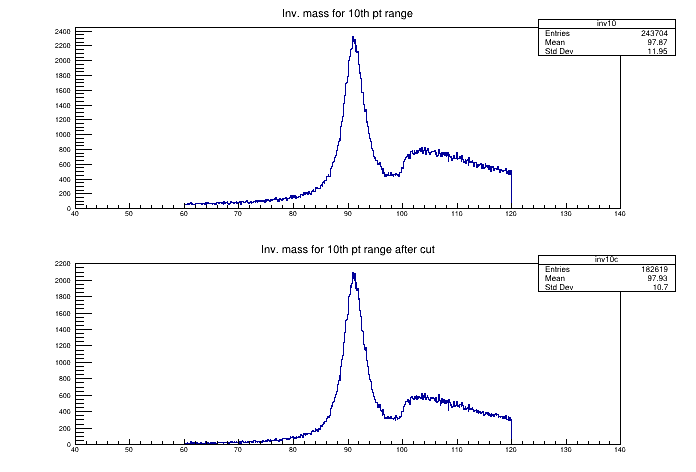

In [15]:
cc10 = ROOT.TCanvas()
cc10.Divide(1,2)
cc10.cd(1)
probeiv10.Draw()
cc10.cd(2)
probeiv10c.Draw()
cc10.Draw()
eff.append(probeiv10c.Integral()/probeiv10.Integral())

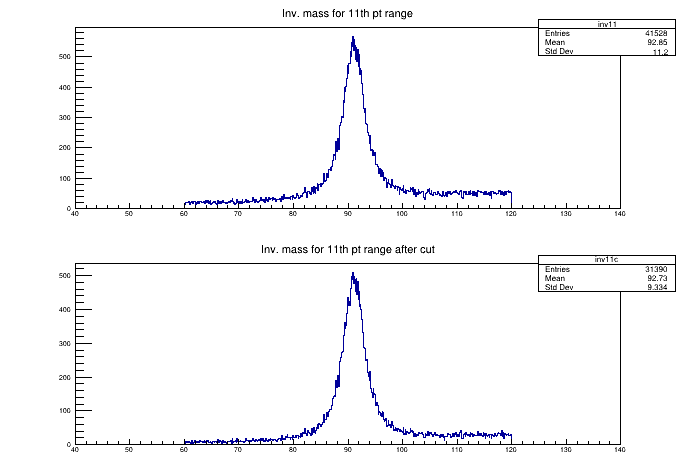

In [16]:
cc11 = ROOT.TCanvas()
cc11.Divide(1,2)
cc11.cd(1)
probeiv11.Draw()
cc11.cd(2)
probeiv11c.Draw()
cc11.Draw()
eff.append(probeiv11c.Integral()/probeiv11.Integral())

In [17]:
f1=ROOT.TFile("hist.root","RECREATE")

probeiv1.Write()
probeiv2.Write()
probeiv3.Write()
probeiv4.Write()
probeiv5.Write()
probeiv6.Write()
probeiv7.Write()
probeiv8.Write()
probeiv9.Write()
probeiv10.Write()
probeiv11.Write()

probeiv1c.Write()
probeiv2c.Write()
probeiv3c.Write()
probeiv4c.Write()
probeiv5c.Write()
probeiv6c.Write()
probeiv7c.Write()
probeiv8c.Write()
probeiv9c.Write()
probeiv10c.Write()
probeiv11c.Write()


1483

In [18]:
f1.Close()

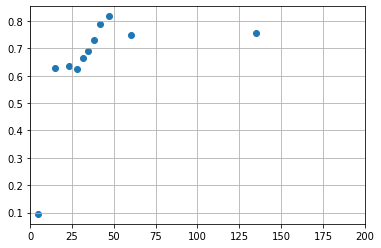

In [19]:
x,y=[],[]
for i in range(len(binedge)-1):
    y.append(eff[i])
    x.append((binedge[i]+binedge[i+1])/2)
plt.scatter(x,y)
plt.xlim(0,200)
plt.grid()
plt.show()

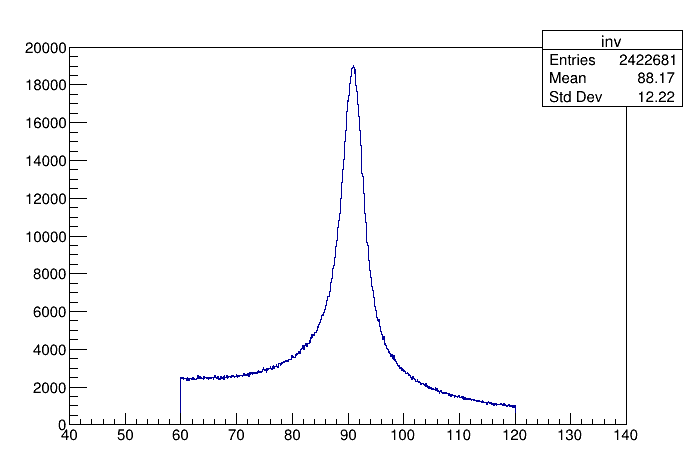

In [20]:
c = ROOT.TCanvas()
inv_mas.Draw()
c.Draw()